In [1]:
%%html
<script>
    // AUTORUN ALL CELLS ON NOTEBOOK-LOAD!
    require(
        ['base/js/namespace', 'jquery'], 
        function(jupyter, $) {
            $(jupyter.events).on("kernel_ready.Kernel", function () {
                console.log("Auto-running all cells-below...");
                jupyter.actions.call('jupyter-notebook:run-all-cells-below');
                jupyter.actions.call('jupyter-notebook:save-notebook');
            });
        }
    );
</script>

In [2]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [3]:
import numpy as np
import pandas as pd
import collections
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder

In [4]:
banknote_data = pd.read_csv("../Datasets/banknote.csv",sep=',')

In [5]:
banknote_data.head()

variance  skewness  kurtosis  entropy  authentic
0   3.62160    8.6661   -2.8073 -0.44699          0
1   4.54590    8.1674   -2.4586 -1.46210          0
2   3.86600   -2.6383    1.9242  0.10645          0
3   3.45660    9.5228   -4.0112 -3.59440          0
4   0.32924   -4.4552    4.5718 -0.98880          0

In [6]:
banknote_data= banknote_data.round()

In [7]:
banknote_data.head()

variance  skewness  kurtosis  entropy  authentic
0       4.0       9.0      -3.0     -0.0          0
1       5.0       8.0      -2.0     -1.0          0
2       4.0      -3.0       2.0      0.0          0
3       3.0      10.0      -4.0     -4.0          0
4       0.0      -4.0       5.0     -1.0          0

In [8]:
X = banknote_data.values[:,0:4]
Y = banknote_data.values[:,4]
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.2, random_state = 100)

In [9]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(3),max_iter=1000)
mlp.fit(X_train,Y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=3, learning_rate='constant',
       learning_rate_init=0.001, max_iter=1000, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

In [10]:
predictions = mlp.predict(X_test)

In [11]:
print('Confusion Matrix:\n\n',confusion_matrix(Y_test,predictions))
print("\n")
print('Classification Report:\n\n',classification_report(Y_test,predictions,target_names=['0','1']))

Confusion Matrix:

 [[163   0]
 [  0 112]]


Classification Report:

               precision    recall  f1-score   support

           0       1.00      1.00      1.00       163
           1       1.00      1.00      1.00       112

   micro avg       1.00      1.00      1.00       275
   macro avg       1.00      1.00      1.00       275
weighted avg       1.00      1.00      1.00       275



In [12]:
print(mlp.predict_proba(X_test))

[[5.31681652e-04 9.99468318e-01]
 [9.96823114e-01 3.17688640e-03]
 [1.25317783e-03 9.98746822e-01]
 [9.97811632e-01 2.18836769e-03]
 [9.97001908e-01 2.99809182e-03]
 [9.57540525e-01 4.24594753e-02]
 [8.94257504e-06 9.99991057e-01]
 [9.99337248e-01 6.62752471e-04]
 [1.25477639e-04 9.99874522e-01]
 [9.98677329e-01 1.32267108e-03]
 [9.92645431e-01 7.35456891e-03]
 [1.17461910e-05 9.99988254e-01]
 [1.97234766e-06 9.99998028e-01]
 [9.98907047e-01 1.09295327e-03]
 [9.99055400e-01 9.44600290e-04]
 [9.94637487e-01 5.36251349e-03]
 [9.99736001e-01 2.63998716e-04]
 [9.97207062e-01 2.79293776e-03]
 [9.99386434e-01 6.13566282e-04]
 [9.66713759e-01 3.32862413e-02]
 [1.68704233e-03 9.98312958e-01]
 [1.29733819e-05 9.99987027e-01]
 [9.98794069e-01 1.20593141e-03]
 [4.52191034e-05 9.99954781e-01]
 [1.10801219e-04 9.99889199e-01]
 [9.36193529e-05 9.99906381e-01]
 [9.91795871e-01 8.20412889e-03]
 [3.15183384e-04 9.99684817e-01]
 [1.14511691e-03 9.98854883e-01]
 [9.99570186e-01 4.29813979e-04]
 [1.108012

In [13]:
pkmn = pd.read_csv("../Datasets/Pokemon.csv")
pkmn.loc[pkmn['Legendary']==False,'Legendary']=0
pkmn.loc[pkmn['Legendary']==True,'Legendary']=1
pkmn = pkmn.drop(['#','Name','Type 1','Type 2','Generation'],axis=1)
pkmn.isnull().sum()
pkmn

Total   HP  Attack  Defense  Sp. Atk  Sp. Def  Speed  Legendary
0      318   45      49       49       65       65     45          0
1      405   60      62       63       80       80     60          0
2      525   80      82       83      100      100     80          0
3      625   80     100      123      122      120     80          0
4      309   39      52       43       60       50     65          0
5      405   58      64       58       80       65     80          0
6      534   78      84       78      109       85    100          0
7      634   78     130      111      130       85    100          0
8      634   78     104       78      159      115    100          0
9      314   44      48       65       50       64     43          0
10     405   59      63       80       65       80     58          0
11     530   79      83      100       85      105     78          0
12     630   79     103      120      135      115     78          0
13     195   45      30       35       20       20     45          0
14     205   50      20       55       25       25     30          0
15     395   60      45       50       90       80     70          0
16     195   40      35       30       20       20     50          0
17     205   45      25       50       25       25     35          0
18     395   65      90       40       45       80     75          0
19     495   65     150       40       15       80    145          0
20     251   40      45       40       35       35     56          0
21     349   63      60       55       50       50     71          0
22     479   83      80       75       70       70    101          0
23     579   83      80       80      135       80    121          0
24     253   30      56       35       25       35     72          0
25     413   55      81       60       50       70     97          0
26     262   40      60       30       31       31     70          0
27     442   65      90       65       61       61    100          0
28     288   35      60       44       40       54     55          0
29     438   60      85       69       65       79     80          0
..     ...  ...     ...      ...      ...      ...    ...        ...
770    525   95      65       65      110      130     60          0
771    500   78      92       75       74       63    118          0
772    431   67      58       57       81       67    101          0
773    500   50      50      150       50      150     50          0
774    300   45      50       35       55       75     40          0
775    452   68      75       53       83      113     60          0
776    600   90     100       70      110      150     80          0
777    470   57      80       91       80       87     75          0
778    309   43      70       48       50       60     38          0
779    474   85     110       76       65       82     56          0
780    335   49      66       70       44       55     51          0
781    335   44      66       70       44       55     56          0
782    335   54      66       70       44       55     46          0
783    335   59      66       70       44       55     41          0
784    494   65      90      122       58       75     84          0
785    494   55      85      122       58       75     99          0
786    494   75      95      122       58       75     69          0
787    494   85     100      122       58       75     54          0
788    304   55      69       85       32       35     28          0
789    514   95     117      184       44       46     28          0
790    245   40      30       35       45       40     55          0
791    535   85      70       80       97       80    123          0
792    680  126     131       95      131       98     99          1
793    680  126     131       95      131       98     99          1
794    600  108     100      121       81       95     95          1
795    600   50     100      150      100      150     50          1
796

In [14]:
pkmn

Total   HP  Attack  Defense  Sp. Atk  Sp. Def  Speed  Legendary
0      318   45      49       49       65       65     45          0
1      405   60      62       63       80       80     60          0
2      525   80      82       83      100      100     80          0
3      625   80     100      123      122      120     80          0
4      309   39      52       43       60       50     65          0
5      405   58      64       58       80       65     80          0
6      534   78      84       78      109       85    100          0
7      634   78     130      111      130       85    100          0
8      634   78     104       78      159      115    100          0
9      314   44      48       65       50       64     43          0
10     405   59      63       80       65       80     58          0
11     530   79      83      100       85      105     78          0
12     630   79     103      120      135      115     78          0
13     195   45      30       35       20       20     45          0
14     205   50      20       55       25       25     30          0
15     395   60      45       50       90       80     70          0
16     195   40      35       30       20       20     50          0
17     205   45      25       50       25       25     35          0
18     395   65      90       40       45       80     75          0
19     495   65     150       40       15       80    145          0
20     251   40      45       40       35       35     56          0
21     349   63      60       55       50       50     71          0
22     479   83      80       75       70       70    101          0
23     579   83      80       80      135       80    121          0
24     253   30      56       35       25       35     72          0
25     413   55      81       60       50       70     97          0
26     262   40      60       30       31       31     70          0
27     442   65      90       65       61       61    100          0
28     288   35      60       44       40       54     55          0
29     438   60      85       69       65       79     80          0
..     ...  ...     ...      ...      ...      ...    ...        ...
770    525   95      65       65      110      130     60          0
771    500   78      92       75       74       63    118          0
772    431   67      58       57       81       67    101          0
773    500   50      50      150       50      150     50          0
774    300   45      50       35       55       75     40          0
775    452   68      75       53       83      113     60          0
776    600   90     100       70      110      150     80          0
777    470   57      80       91       80       87     75          0
778    309   43      70       48       50       60     38          0
779    474   85     110       76       65       82     56          0
780    335   49      66       70       44       55     51          0
781    335   44      66       70       44       55     56          0
782    335   54      66       70       44       55     46          0
783    335   59      66       70       44       55     41          0
784    494   65      90      122       58       75     84          0
785    494   55      85      122       58       75     99          0
786    494   75      95      122       58       75     69          0
787    494   85     100      122       58       75     54          0
788    304   55      69       85       32       35     28          0
789    514   95     117      184       44       46     28          0
790    245   40      30       35       45       40     55          0
791    535   85      70       80       97       80    123          0
792    680  126     131       95      131       98     99          1
793    680  126     131       95      131       98     99          1
794    600  108     100      121       81       95     95          1
795    600   50     100      150      100      150     50          1
796

Class 0: 735
Class 1: 65
Proportion: 11.31 : 1


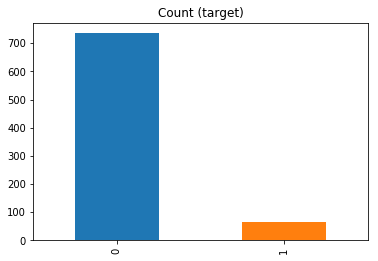

In [15]:
target_count = pkmn['Legendary'].value_counts()
print('Class 0:', target_count[0])
print('Class 1:', target_count[1])
print('Proportion:', round(target_count[0] / target_count[1], 2), ': 1')
target_count.plot(kind='bar', title='Count (target)');

In [16]:
import seaborn as sb
%config InlineBackend.figure_format = 'svg'
s = sb.pairplot(pkmn, hue="Legendary",height = 3,vars=["HP","Attack","Defense","Sp. Atk", "Sp. Def"],palette="husl")

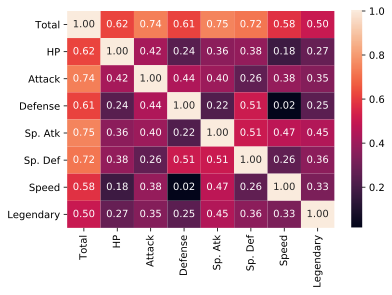

In [17]:
heat = sb.heatmap(pkmn.corr(),annot=True, fmt='.2f')

In [18]:
y = pkmn['Legendary'].values
X = pkmn.values[:,:-1]
X_train, X_test, Y_train, Y_test = train_test_split(X,y,test_size = 0.2, stratify=y)

Class 0: 588
Class 1: 52
Proportion: 11.31 : 1


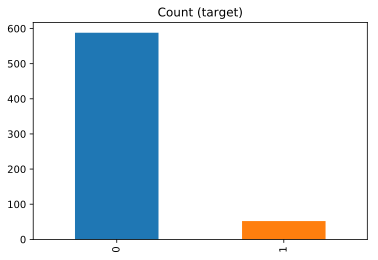

In [19]:
target_count = pd.Series(Y_train).value_counts()
print('Class 0:', target_count[0])
print('Class 1:', target_count[1])
print('Proportion:', round(target_count[0] / target_count[1], 2), ': 1')

target_count.plot(kind='bar', title='Count (target)');

In [20]:
def plot_2d_space(X, y, label='Classes'):   
    colors = ['#1F77B4', '#FF7F0E']
    markers = ['o', 's']
    for l, c, m in zip(np.unique(y), colors, markers):
        plt.scatter(
            X[y==l, 0],
            X[y==l, 1],
            c=c, label=l, marker=m
        )
    plt.title(label)
    plt.legend(loc='upper right')
    plt.show()

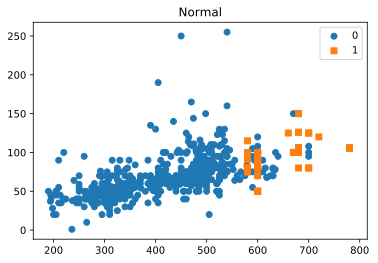

In [21]:
plot_2d_space(X_train, Y_train, 'Normal')

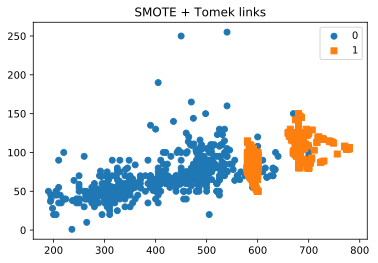

Counter({0: 588, 1: 588})

In [22]:
from imblearn.combine import SMOTETomek
from sklearn.decomposition import PCA
smt = SMOTETomek(ratio='auto')
X_smt, Y_smt = smt.fit_sample(X_train, Y_train)
plot_2d_space(X_smt, Y_smt, 'SMOTE + Tomek links')
collections.Counter(Y_smt)

Class 0: 588
Class 1: 588
Proportion: 1.0 : 1


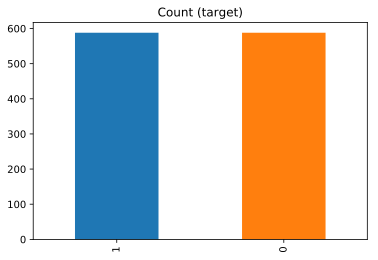

In [23]:
target_count = pd.Series(Y_smt).value_counts()
print('Class 0:', target_count[0])
print('Class 1:', target_count[1])
print('Proportion:', round(target_count[0] / target_count[1], 2), ': 1')
target_count.plot(kind='bar', title='Count (target)');

In [24]:
X_train = X_smt
Y_train = Y_smt

Iteration 1, loss = 11.49662849
Iteration 2, loss = 8.35199162
Iteration 3, loss = 7.24214776
Iteration 4, loss = 4.26525677
Iteration 5, loss = 5.13384063
Iteration 6, loss = 3.25564403
Iteration 7, loss = 3.06143755
Iteration 8, loss = 2.90212466
Iteration 9, loss = 2.50122277
Iteration 10, loss = 2.25085420
Iteration 11, loss = 2.07154195
Iteration 12, loss = 1.91578201
Iteration 13, loss = 1.73920729
Iteration 14, loss = 1.53421603
Iteration 15, loss = 1.33309679
Iteration 16, loss = 1.21547658
Iteration 17, loss = 1.05350290
Iteration 18, loss = 0.89839137
Iteration 19, loss = 0.80947427
Iteration 20, loss = 0.72174212
Iteration 21, loss = 0.65540796
Iteration 22, loss = 0.60313413
Iteration 23, loss = 0.57491787
Iteration 24, loss = 0.53674368
Iteration 25, loss = 0.53419548
Iteration 26, loss = 0.52642491
Iteration 27, loss = 0.50699598
Iteration 28, loss = 0.49367841
Iteration 29, loss = 0.48780105
Iteration 30, loss = 0.47330175
Iteration 31, loss = 0.45871268
Iteration 32, lo

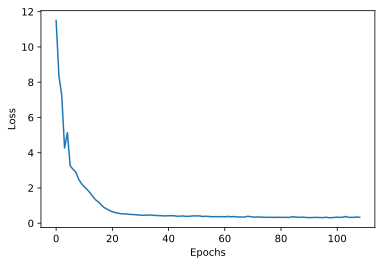

In [25]:
mlp = MLPClassifier(hidden_layer_sizes=(100),max_iter=10000)
mlp.fit(X_smt,Y_smt)
plt.plot(mlp.loss_curve_)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.savefig('LossvsEpoch.png')
plt.show()

In [26]:
predictions = mlp.predict(X_test)

In [27]:
collections.Counter(Y_test)

Counter({1: 13, 0: 147})

In [28]:
def report(predictions, Y_test):
    print('Confusion Matrix:\n\n',confusion_matrix(Y_test,predictions))
    print("\n")
    print('Classification Report:\n\n',classification_report(Y_test,predictions,target_names=['0','1']))
    accuracy = accuracy_score(Y_test, predictions)
    print("Accuracy:%.2f%%" %(accuracy*100.0))
    print('Misclassified samples: %d' % (Y_test != predictions).sum())
    return
report(predictions, Y_test)

Confusion Matrix:

 [[128  19]
 [  5   8]]


Classification Report:

               precision    recall  f1-score   support

           0       0.96      0.87      0.91       147
           1       0.30      0.62      0.40        13

   micro avg       0.85      0.85      0.85       160
   macro avg       0.63      0.74      0.66       160
weighted avg       0.91      0.85      0.87       160

Accuracy:85.00%
Misclassified samples: 24


In [29]:
print(mlp.predict_proba(X_test))

[[1.69033208e-01 8.30966792e-01]
 [7.10875661e-01 2.89124339e-01]
 [8.38963104e-01 1.61036896e-01]
 [8.75790973e-01 1.24209027e-01]
 [9.02647516e-01 9.73524843e-02]
 [9.83452138e-01 1.65478615e-02]
 [6.69524737e-01 3.30475263e-01]
 [8.73480202e-01 1.26519798e-01]
 [4.73254457e-01 5.26745543e-01]
 [7.54433834e-01 2.45566166e-01]
 [6.95234385e-01 3.04765615e-01]
 [8.72821099e-01 1.27178901e-01]
 [7.81788983e-01 2.18211017e-01]
 [7.60046572e-01 2.39953428e-01]
 [6.61186243e-01 3.38813757e-01]
 [1.50907080e-01 8.49092920e-01]
 [9.11971714e-01 8.80282859e-02]
 [5.74781008e-01 4.25218992e-01]
 [9.98117450e-01 1.88254976e-03]
 [1.56220924e-01 8.43779076e-01]
 [9.69115544e-01 3.08844562e-02]
 [8.93883714e-01 1.06116286e-01]
 [8.37272272e-01 1.62727728e-01]
 [4.92983585e-01 5.07016415e-01]
 [8.79928295e-01 1.20071705e-01]
 [9.98842871e-01 1.15712906e-03]
 [7.79160231e-01 2.20839769e-01]
 [9.25001478e-01 7.49985225e-02]
 [9.92200190e-01 7.79981015e-03]
 [8.41437633e-01 1.58562367e-01]
 [7.370303

Experimenting with Input layers, Iterations and Hidden layers

Case - Varying Number of Iterations


Number of Iterations = 10

Iteration 1, loss = 8.21782703
Iteration 2, loss = 7.43276177
Iteration 3, loss = 6.62163460
Iteration 4, loss = 5.84777157
Iteration 5, loss = 5.09624251
Iteration 6, loss = 4.39100769
Iteration 7, loss = 3.73089307
Iteration 8, loss = 3.08379468
Iteration 9, loss = 2.48465577
Iteration 10, loss = 1.91477434


/Users/vish/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


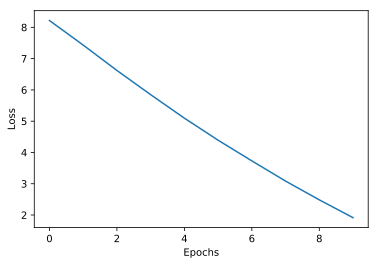

Confusion Matrix:

 [[  0 147]
 [  0  13]]


Classification Report:

               precision    recall  f1-score   support

           0       0.00      0.00      0.00       147
           1       0.08      1.00      0.15        13

   micro avg       0.08      0.08      0.08       160
   macro avg       0.04      0.50      0.08       160
weighted avg       0.01      0.08      0.01       160

Accuracy:8.12%
Misclassified samples: 147

Number of Iterations = 50

Iteration 1, loss = 8.21782703
Iteration 2, loss = 7.43276177
Iteration 3, loss = 6.62163460
Iteration 4, loss = 5.84777157
Iteration 5, loss = 5.09624251
Iteration 6, loss = 4.39100769
Iteration 7, loss = 3.73089307
Iteration 8, loss = 3.08379468
Iteration 9, loss = 2.48465577
Iteration 10, loss = 1.91477434
Iteration 11, loss = 1.40971673
Iteration 12, loss = 0.98611037
Iteration 13, loss = 0.74970231
Iteration 14, loss = 0.71877292
Iteration 15, loss = 0.74895497
Iteration 16, loss = 0.73933494
Iteration 17, loss = 0.7133900

/Users/vish/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/vish/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/vish/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Iteration 35, loss = 0.70254238
Iteration 36, loss = 0.70214522
Iteration 37, loss = 0.70202894
Iteration 38, loss = 0.70183981
Iteration 39, loss = 0.70164975
Iteration 40, loss = 0.70132888
Iteration 41, loss = 0.70107265
Iteration 42, loss = 0.70090892
Iteration 43, loss = 0.70057047
Iteration 44, loss = 0.70039855
Iteration 45, loss = 0.70012104
Iteration 46, loss = 0.69994062
Iteration 47, loss = 0.69964107
Iteration 48, loss = 0.69938114
Iteration 49, loss = 0.69915711
Iteration 50, loss = 0.69897130


/Users/vish/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


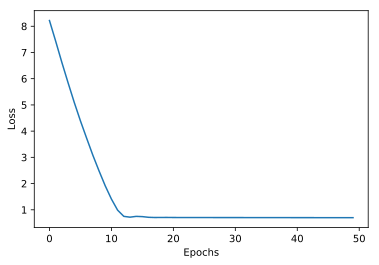

Confusion Matrix:

 [[  0 147]
 [  0  13]]


Classification Report:

               precision    recall  f1-score   support

           0       0.00      0.00      0.00       147
           1       0.08      1.00      0.15        13

   micro avg       0.08      0.08      0.08       160
   macro avg       0.04      0.50      0.08       160
weighted avg       0.01      0.08      0.01       160

Accuracy:8.12%
Misclassified samples: 147

Number of Iterations = 100

Iteration 1, loss = 8.21782703
Iteration 2, loss = 7.43276177
Iteration 3, loss = 6.62163460
Iteration 4, loss = 5.84777157
Iteration 5, loss = 5.09624251
Iteration 6, loss = 4.39100769
Iteration 7, loss = 3.73089307
Iteration 8, loss = 3.08379468
Iteration 9, loss = 2.48465577
Iteration 10, loss = 1.91477434
Iteration 11, loss = 1.40971673
Iteration 12, loss = 0.98611037
Iteration 13, loss = 0.74970231
Iteration 14, loss = 0.71877292
Iteration 15, loss = 0.74895497
Iteration 16, loss = 0.73933494
Iteration 17, loss = 0.713390

/Users/vish/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/vish/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/vish/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Iteration 31, loss = 0.70316121
Iteration 32, loss = 0.70306057
Iteration 33, loss = 0.70282113
Iteration 34, loss = 0.70273042
Iteration 35, loss = 0.70254238
Iteration 36, loss = 0.70214522
Iteration 37, loss = 0.70202894
Iteration 38, loss = 0.70183981
Iteration 39, loss = 0.70164975
Iteration 40, loss = 0.70132888
Iteration 41, loss = 0.70107265
Iteration 42, loss = 0.70090892
Iteration 43, loss = 0.70057047
Iteration 44, loss = 0.70039855
Iteration 45, loss = 0.70012104
Iteration 46, loss = 0.69994062
Iteration 47, loss = 0.69964107
Iteration 48, loss = 0.69938114
Iteration 49, loss = 0.69915711
Iteration 50, loss = 0.69897130
Iteration 51, loss = 0.69913272
Iteration 52, loss = 0.69843202
Iteration 53, loss = 0.69829660
Iteration 54, loss = 0.69792719
Iteration 55, loss = 0.69762797
Iteration 56, loss = 0.69744992
Iteration 57, loss = 0.69714524
Iteration 58, loss = 0.69689773
Iteration 59, loss = 0.69673048
Iteration 60, loss = 0.69635007
Iteration 61, loss = 0.69612358
Iteratio

/Users/vish/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


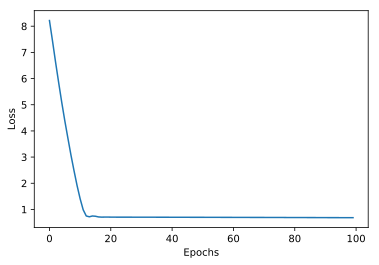

Confusion Matrix:

 [[  0 147]
 [  0  13]]


Classification Report:

               precision    recall  f1-score   support

           0       0.00      0.00      0.00       147
           1       0.08      1.00      0.15        13

   micro avg       0.08      0.08      0.08       160
   macro avg       0.04      0.50      0.08       160
weighted avg       0.01      0.08      0.01       160

Accuracy:8.12%
Misclassified samples: 147

Number of Iterations = 500

Iteration 1, loss = 8.21782703
Iteration 2, loss = 7.43276177
Iteration 3, loss = 6.62163460
Iteration 4, loss = 5.84777157
Iteration 5, loss = 5.09624251
Iteration 6, loss = 4.39100769
Iteration 7, loss = 3.73089307
Iteration 8, loss = 3.08379468
Iteration 9, loss = 2.48465577
Iteration 10, loss = 1.91477434
Iteration 11, loss = 1.40971673
Iteration 12, loss = 0.98611037
Iteration 13, loss = 0.74970231
Iteration 14, loss = 0.71877292
Iteration 15, loss = 0.74895497
Iteration 16, loss = 0.73933494
Iteration 17, loss = 0.713390

/Users/vish/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/vish/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/vish/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Iteration 32, loss = 0.70306057
Iteration 33, loss = 0.70282113
Iteration 34, loss = 0.70273042
Iteration 35, loss = 0.70254238
Iteration 36, loss = 0.70214522
Iteration 37, loss = 0.70202894
Iteration 38, loss = 0.70183981
Iteration 39, loss = 0.70164975
Iteration 40, loss = 0.70132888
Iteration 41, loss = 0.70107265
Iteration 42, loss = 0.70090892
Iteration 43, loss = 0.70057047
Iteration 44, loss = 0.70039855
Iteration 45, loss = 0.70012104
Iteration 46, loss = 0.69994062
Iteration 47, loss = 0.69964107
Iteration 48, loss = 0.69938114
Iteration 49, loss = 0.69915711
Iteration 50, loss = 0.69897130
Iteration 51, loss = 0.69913272
Iteration 52, loss = 0.69843202
Iteration 53, loss = 0.69829660
Iteration 54, loss = 0.69792719
Iteration 55, loss = 0.69762797
Iteration 56, loss = 0.69744992
Iteration 57, loss = 0.69714524
Iteration 58, loss = 0.69689773
Iteration 59, loss = 0.69673048
Iteration 60, loss = 0.69635007
Iteration 61, loss = 0.69612358
Iteration 62, loss = 0.69582507
Iteratio

Iteration 299, loss = 0.61081292
Iteration 300, loss = 0.61082705
Iteration 301, loss = 0.60915054
Iteration 302, loss = 0.60906225
Iteration 303, loss = 0.60819275
Iteration 304, loss = 0.60811597
Iteration 305, loss = 0.60752652
Iteration 306, loss = 0.60720304
Iteration 307, loss = 0.60741428
Iteration 308, loss = 0.60660856
Iteration 309, loss = 0.60649666
Iteration 310, loss = 0.60536388
Iteration 311, loss = 0.60539185
Iteration 312, loss = 0.60474354
Iteration 313, loss = 0.60483260
Iteration 314, loss = 0.60429549
Iteration 315, loss = 0.60461297
Iteration 316, loss = 0.60371418
Iteration 317, loss = 0.60394292
Iteration 318, loss = 0.60254625
Iteration 319, loss = 0.60229664
Iteration 320, loss = 0.60161219
Iteration 321, loss = 0.60155654
Iteration 322, loss = 0.60125756
Iteration 323, loss = 0.60161680
Iteration 324, loss = 0.60011179
Iteration 325, loss = 0.60132643
Iteration 326, loss = 0.59932108
Iteration 327, loss = 0.59947344
Iteration 328, loss = 0.59870445
Iteration 

/Users/vish/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


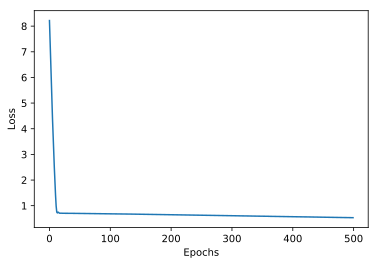

Confusion Matrix:

 [[78 69]
 [ 0 13]]


Classification Report:

               precision    recall  f1-score   support

           0       1.00      0.53      0.69       147
           1       0.16      1.00      0.27        13

   micro avg       0.57      0.57      0.57       160
   macro avg       0.58      0.77      0.48       160
weighted avg       0.93      0.57      0.66       160

Accuracy:56.88%
Misclassified samples: 69

Number of Iterations = 1000

Iteration 1, loss = 8.21782703
Iteration 2, loss = 7.43276177
Iteration 3, loss = 6.62163460
Iteration 4, loss = 5.84777157
Iteration 5, loss = 5.09624251
Iteration 6, loss = 4.39100769
Iteration 7, loss = 3.73089307
Iteration 8, loss = 3.08379468
Iteration 9, loss = 2.48465577
Iteration 10, loss = 1.91477434
Iteration 11, loss = 1.40971673
Iteration 12, loss = 0.98611037
Iteration 13, loss = 0.74970231
Iteration 14, loss = 0.71877292
Iteration 15, loss = 0.74895497
Iteration 16, loss = 0.73933494
Iteration 17, loss = 0.71339000


Iteration 263, loss = 0.62388198
Iteration 264, loss = 0.62371660
Iteration 265, loss = 0.62326112
Iteration 266, loss = 0.62307542
Iteration 267, loss = 0.62238202
Iteration 268, loss = 0.62228934
Iteration 269, loss = 0.62151656
Iteration 270, loss = 0.62163838
Iteration 271, loss = 0.62111633
Iteration 272, loss = 0.62055776
Iteration 273, loss = 0.62115534
Iteration 274, loss = 0.61921777
Iteration 275, loss = 0.62048960
Iteration 276, loss = 0.61912538
Iteration 277, loss = 0.61925791
Iteration 278, loss = 0.61794997
Iteration 279, loss = 0.61790664
Iteration 280, loss = 0.61739892
Iteration 281, loss = 0.61760660
Iteration 282, loss = 0.61679911
Iteration 283, loss = 0.61651488
Iteration 284, loss = 0.61583824
Iteration 285, loss = 0.61539380
Iteration 286, loss = 0.61553936
Iteration 287, loss = 0.61453467
Iteration 288, loss = 0.61434466
Iteration 289, loss = 0.61377777
Iteration 290, loss = 0.61358140
Iteration 291, loss = 0.61296352
Iteration 292, loss = 0.61269131
Iteration 

Iteration 519, loss = 0.52545169
Iteration 520, loss = 0.52507507
Iteration 521, loss = 0.52407608
Iteration 522, loss = 0.52435790
Iteration 523, loss = 0.52405166
Iteration 524, loss = 0.52395710
Iteration 525, loss = 0.52303685
Iteration 526, loss = 0.52299887
Iteration 527, loss = 0.52193324
Iteration 528, loss = 0.52256477
Iteration 529, loss = 0.52159254
Iteration 530, loss = 0.52098929
Iteration 531, loss = 0.52047578
Iteration 532, loss = 0.51988694
Iteration 533, loss = 0.51979436
Iteration 534, loss = 0.51964630
Iteration 535, loss = 0.51910419
Iteration 536, loss = 0.51878516
Iteration 537, loss = 0.51810827
Iteration 538, loss = 0.51795025
Iteration 539, loss = 0.51852348
Iteration 540, loss = 0.51734501
Iteration 541, loss = 0.51661945
Iteration 542, loss = 0.51699563
Iteration 543, loss = 0.51586501
Iteration 544, loss = 0.51551901
Iteration 545, loss = 0.51525045
Iteration 546, loss = 0.51488572
Iteration 547, loss = 0.51477070
Iteration 548, loss = 0.51445910
Iteration 

Iteration 793, loss = 0.43151118
Iteration 794, loss = 0.43138856
Iteration 795, loss = 0.43107151
Iteration 796, loss = 0.43107943
Iteration 797, loss = 0.43050136
Iteration 798, loss = 0.43003350
Iteration 799, loss = 0.42994597
Iteration 800, loss = 0.42969770
Iteration 801, loss = 0.42918839
Iteration 802, loss = 0.42965353
Iteration 803, loss = 0.42907690
Iteration 804, loss = 0.42872234
Iteration 805, loss = 0.42860296
Iteration 806, loss = 0.42796409
Iteration 807, loss = 0.42799839
Iteration 808, loss = 0.42895914
Iteration 809, loss = 0.42764821
Iteration 810, loss = 0.42768942
Iteration 811, loss = 0.42700858
Iteration 812, loss = 0.42744012
Iteration 813, loss = 0.42729262
Iteration 814, loss = 0.42697181
Iteration 815, loss = 0.42611810
Iteration 816, loss = 0.42579772
Iteration 817, loss = 0.42585779
Iteration 818, loss = 0.42539248
Iteration 819, loss = 0.42569722
Iteration 820, loss = 0.42460397
Iteration 821, loss = 0.42485776
Iteration 822, loss = 0.42474650
Iteration 

/Users/vish/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


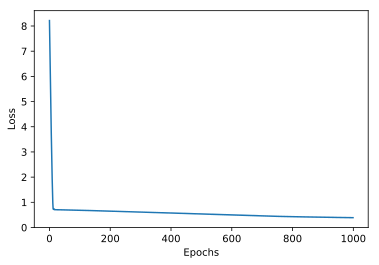

Confusion Matrix:

 [[115  32]
 [  1  12]]


Classification Report:

               precision    recall  f1-score   support

           0       0.99      0.78      0.87       147
           1       0.27      0.92      0.42        13

   micro avg       0.79      0.79      0.79       160
   macro avg       0.63      0.85      0.65       160
weighted avg       0.93      0.79      0.84       160

Accuracy:79.38%
Misclassified samples: 33

Number of Iterations = 10000

Iteration 1, loss = 8.21782703
Iteration 2, loss = 7.43276177
Iteration 3, loss = 6.62163460
Iteration 4, loss = 5.84777157
Iteration 5, loss = 5.09624251
Iteration 6, loss = 4.39100769
Iteration 7, loss = 3.73089307
Iteration 8, loss = 3.08379468
Iteration 9, loss = 2.48465577
Iteration 10, loss = 1.91477434
Iteration 11, loss = 1.40971673
Iteration 12, loss = 0.98611037
Iteration 13, loss = 0.74970231
Iteration 14, loss = 0.71877292
Iteration 15, loss = 0.74895497
Iteration 16, loss = 0.73933494
Iteration 17, loss = 0.7133

Iteration 269, loss = 0.62151656
Iteration 270, loss = 0.62163838
Iteration 271, loss = 0.62111633
Iteration 272, loss = 0.62055776
Iteration 273, loss = 0.62115534
Iteration 274, loss = 0.61921777
Iteration 275, loss = 0.62048960
Iteration 276, loss = 0.61912538
Iteration 277, loss = 0.61925791
Iteration 278, loss = 0.61794997
Iteration 279, loss = 0.61790664
Iteration 280, loss = 0.61739892
Iteration 281, loss = 0.61760660
Iteration 282, loss = 0.61679911
Iteration 283, loss = 0.61651488
Iteration 284, loss = 0.61583824
Iteration 285, loss = 0.61539380
Iteration 286, loss = 0.61553936
Iteration 287, loss = 0.61453467
Iteration 288, loss = 0.61434466
Iteration 289, loss = 0.61377777
Iteration 290, loss = 0.61358140
Iteration 291, loss = 0.61296352
Iteration 292, loss = 0.61269131
Iteration 293, loss = 0.61253297
Iteration 294, loss = 0.61223408
Iteration 295, loss = 0.61185880
Iteration 296, loss = 0.61148004
Iteration 297, loss = 0.61068262
Iteration 298, loss = 0.61101487
Iteration 

Iteration 541, loss = 0.51661945
Iteration 542, loss = 0.51699563
Iteration 543, loss = 0.51586501
Iteration 544, loss = 0.51551901
Iteration 545, loss = 0.51525045
Iteration 546, loss = 0.51488572
Iteration 547, loss = 0.51477070
Iteration 548, loss = 0.51445910
Iteration 549, loss = 0.51358544
Iteration 550, loss = 0.51605860
Iteration 551, loss = 0.51346924
Iteration 552, loss = 0.51269974
Iteration 553, loss = 0.51302492
Iteration 554, loss = 0.51177213
Iteration 555, loss = 0.51307366
Iteration 556, loss = 0.51172392
Iteration 557, loss = 0.51194972
Iteration 558, loss = 0.51033943
Iteration 559, loss = 0.50985144
Iteration 560, loss = 0.50965438
Iteration 561, loss = 0.50890717
Iteration 562, loss = 0.50854354
Iteration 563, loss = 0.50837775
Iteration 564, loss = 0.50814317
Iteration 565, loss = 0.50819523
Iteration 566, loss = 0.50774553
Iteration 567, loss = 0.50661744
Iteration 568, loss = 0.50678282
Iteration 569, loss = 0.50607972
Iteration 570, loss = 0.50553805
Iteration 

Iteration 797, loss = 0.43050136
Iteration 798, loss = 0.43003350
Iteration 799, loss = 0.42994597
Iteration 800, loss = 0.42969770
Iteration 801, loss = 0.42918839
Iteration 802, loss = 0.42965353
Iteration 803, loss = 0.42907690
Iteration 804, loss = 0.42872234
Iteration 805, loss = 0.42860296
Iteration 806, loss = 0.42796409
Iteration 807, loss = 0.42799839
Iteration 808, loss = 0.42895914
Iteration 809, loss = 0.42764821
Iteration 810, loss = 0.42768942
Iteration 811, loss = 0.42700858
Iteration 812, loss = 0.42744012
Iteration 813, loss = 0.42729262
Iteration 814, loss = 0.42697181
Iteration 815, loss = 0.42611810
Iteration 816, loss = 0.42579772
Iteration 817, loss = 0.42585779
Iteration 818, loss = 0.42539248
Iteration 819, loss = 0.42569722
Iteration 820, loss = 0.42460397
Iteration 821, loss = 0.42485776
Iteration 822, loss = 0.42474650
Iteration 823, loss = 0.42392167
Iteration 824, loss = 0.42412122
Iteration 825, loss = 0.42378243
Iteration 826, loss = 0.42356804
Iteration 

Iteration 1072, loss = 0.37766402
Iteration 1073, loss = 0.37682722
Iteration 1074, loss = 0.37673900
Iteration 1075, loss = 0.37666458
Iteration 1076, loss = 0.37727451
Iteration 1077, loss = 0.37634349
Iteration 1078, loss = 0.37692122
Iteration 1079, loss = 0.37606349
Iteration 1080, loss = 0.37593168
Iteration 1081, loss = 0.37558572
Iteration 1082, loss = 0.37536593
Iteration 1083, loss = 0.37641799
Iteration 1084, loss = 0.37476271
Iteration 1085, loss = 0.37536186
Iteration 1086, loss = 0.37486310
Iteration 1087, loss = 0.37569120
Iteration 1088, loss = 0.37542458
Iteration 1089, loss = 0.37520735
Iteration 1090, loss = 0.37504949
Iteration 1091, loss = 0.37393493
Iteration 1092, loss = 0.37391088
Iteration 1093, loss = 0.37375870
Iteration 1094, loss = 0.37422702
Iteration 1095, loss = 0.37361673
Iteration 1096, loss = 0.37339873
Iteration 1097, loss = 0.37303715
Iteration 1098, loss = 0.37347490
Iteration 1099, loss = 0.37284175
Iteration 1100, loss = 0.37296941
Iteration 1101

Iteration 1344, loss = 0.33967549
Iteration 1345, loss = 0.33960760
Iteration 1346, loss = 0.33936771
Iteration 1347, loss = 0.33929017
Iteration 1348, loss = 0.33924949
Iteration 1349, loss = 0.33901508
Iteration 1350, loss = 0.33962788
Iteration 1351, loss = 0.33936977
Iteration 1352, loss = 0.33891293
Iteration 1353, loss = 0.33962074
Iteration 1354, loss = 0.34018614
Iteration 1355, loss = 0.34011897
Iteration 1356, loss = 0.34145372
Iteration 1357, loss = 0.33965183
Iteration 1358, loss = 0.33797161
Iteration 1359, loss = 0.33884593
Iteration 1360, loss = 0.33778267
Iteration 1361, loss = 0.33823792
Iteration 1362, loss = 0.33770087
Iteration 1363, loss = 0.33729129
Iteration 1364, loss = 0.33843537
Iteration 1365, loss = 0.33776150
Iteration 1366, loss = 0.33732033
Iteration 1367, loss = 0.33691640
Iteration 1368, loss = 0.33736838
Iteration 1369, loss = 0.33864335
Iteration 1370, loss = 0.33759313
Iteration 1371, loss = 0.33615178
Iteration 1372, loss = 0.33888434
Iteration 1373

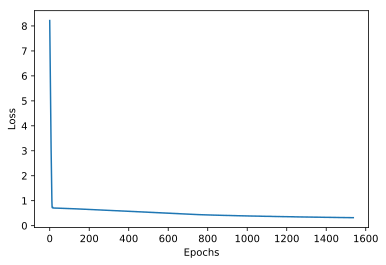

Confusion Matrix:

 [[122  25]
 [  0  13]]


Classification Report:

               precision    recall  f1-score   support

           0       1.00      0.83      0.91       147
           1       0.34      1.00      0.51        13

   micro avg       0.84      0.84      0.84       160
   macro avg       0.67      0.91      0.71       160
weighted avg       0.95      0.84      0.87       160

Accuracy:84.38%
Misclassified samples: 25


In [30]:
M = [10, 50, 100, 500, 1000, 10000]
for i in M:
    print('\nNumber of Iterations =',i,end='\n\n')
    mlp = MLPClassifier(hidden_layer_sizes=(4),max_iter=i, verbose=True, random_state=1)
    mlp.fit(X_train,Y_train) 
    plt.plot(mlp.loss_curve_)
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.show()
    predictions = mlp.predict(X_test)
    report(predictions, Y_test)

Case - Max Input Layers, 1 Hidden Layer, Hidden Layer sizes = 10, 100, 1000, 1000 Iterations


Number of Hidden Layers = 1, Size of hidden layers = 10

Iteration 1, loss = 11.41186243
Iteration 2, loss = 11.34570623
Iteration 3, loss = 11.26944178
Iteration 4, loss = 11.13211834
Iteration 5, loss = 10.93226776
Iteration 6, loss = 10.66927288
Iteration 7, loss = 10.32847141
Iteration 8, loss = 9.96313870
Iteration 9, loss = 9.53362138
Iteration 10, loss = 8.97472938
Iteration 11, loss = 8.23907662
Iteration 12, loss = 7.21212587
Iteration 13, loss = 5.70120884
Iteration 14, loss = 3.72241489
Iteration 15, loss = 1.99231062
Iteration 16, loss = 1.75954906
Iteration 17, loss = 1.80324113
Iteration 18, loss = 1.46013505
Iteration 19, loss = 1.41748072
Iteration 20, loss = 1.40535447
Iteration 21, loss = 1.32530714
Iteration 22, loss = 1.29016013
Iteration 23, loss = 1.26753052
Iteration 24, loss = 1.23265845
Iteration 25, loss = 1.20698747
Iteration 26, loss = 1.18422070
Iteration 27, loss = 1.16161633
Iteration 28, loss = 1.13301496
Iteration 29, loss = 1.11050675
Iteration 30, lo

Iteration 257, loss = 0.41712803
Iteration 258, loss = 0.41529046
Iteration 259, loss = 0.41491233
Iteration 260, loss = 0.41454302
Iteration 261, loss = 0.41462141
Iteration 262, loss = 0.41476534
Iteration 263, loss = 0.41418544
Iteration 264, loss = 0.41036783
Iteration 265, loss = 0.41154000
Iteration 266, loss = 0.41045840
Iteration 267, loss = 0.40962451
Iteration 268, loss = 0.41167129
Iteration 269, loss = 0.41202237
Iteration 270, loss = 0.40963076
Iteration 271, loss = 0.40909939
Iteration 272, loss = 0.40643071
Iteration 273, loss = 0.40568895
Iteration 274, loss = 0.40620623
Iteration 275, loss = 0.40504440
Iteration 276, loss = 0.40430574
Iteration 277, loss = 0.40387649
Iteration 278, loss = 0.40471867
Iteration 279, loss = 0.40231145
Iteration 280, loss = 0.41316190
Iteration 281, loss = 0.40530187
Iteration 282, loss = 0.40020160
Iteration 283, loss = 0.39969808
Iteration 284, loss = 0.40308875
Iteration 285, loss = 0.40657228
Iteration 286, loss = 0.40863845
Iteration 

Iteration 511, loss = 0.30889033
Iteration 512, loss = 0.30875132
Iteration 513, loss = 0.30973713
Iteration 514, loss = 0.30953025
Iteration 515, loss = 0.30739687
Iteration 516, loss = 0.30752454
Iteration 517, loss = 0.30669709
Iteration 518, loss = 0.30953569
Iteration 519, loss = 0.30991526
Iteration 520, loss = 0.30882572
Iteration 521, loss = 0.30893585
Iteration 522, loss = 0.30793622
Iteration 523, loss = 0.31609511
Iteration 524, loss = 0.31050507
Iteration 525, loss = 0.31458184
Iteration 526, loss = 0.31707927
Iteration 527, loss = 0.30587495
Iteration 528, loss = 0.30546204
Iteration 529, loss = 0.30316304
Iteration 530, loss = 0.30797527
Iteration 531, loss = 0.30756111
Iteration 532, loss = 0.30772325
Iteration 533, loss = 0.30017333
Iteration 534, loss = 0.31184928
Iteration 535, loss = 0.30379108
Iteration 536, loss = 0.30095800
Iteration 537, loss = 0.30292233
Iteration 538, loss = 0.30341885
Iteration 539, loss = 0.30038147
Iteration 540, loss = 0.30338104
Iteration 

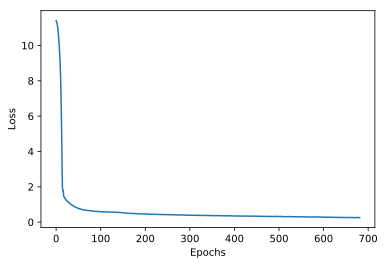

Confusion Matrix:

 [[125  22]
 [  2  11]]


Classification Report:

               precision    recall  f1-score   support

           0       0.98      0.85      0.91       147
           1       0.33      0.85      0.48        13

   micro avg       0.85      0.85      0.85       160
   macro avg       0.66      0.85      0.70       160
weighted avg       0.93      0.85      0.88       160

Accuracy:85.00%
Misclassified samples: 24

Number of Hidden Layers = 1, Size of hidden layers = 100

Iteration 1, loss = 11.51292932
Iteration 2, loss = 11.51292926
Iteration 3, loss = 11.51156793
Iteration 4, loss = 6.43942716
Iteration 5, loss = 8.56179854
Iteration 6, loss = 8.59609799
Iteration 7, loss = 3.44824273
Iteration 8, loss = 4.37462422
Iteration 9, loss = 2.25391372
Iteration 10, loss = 2.13490314
Iteration 11, loss = 1.84602582
Iteration 12, loss = 1.65834667
Iteration 13, loss = 1.50594640
Iteration 14, loss = 1.43108210
Iteration 15, loss = 1.38703055
Iteration 16, loss = 1.31968

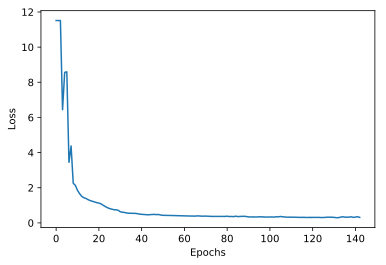

Confusion Matrix:

 [[130  17]
 [  4   9]]


Classification Report:

               precision    recall  f1-score   support

           0       0.97      0.88      0.93       147
           1       0.35      0.69      0.46        13

   micro avg       0.87      0.87      0.87       160
   macro avg       0.66      0.79      0.69       160
weighted avg       0.92      0.87      0.89       160

Accuracy:86.88%
Misclassified samples: 21

Number of Hidden Layers = 1, Size of hidden layers = 1000

Iteration 1, loss = 9.66818544
Iteration 2, loss = 5.81691908
Iteration 3, loss = 3.00225364
Iteration 4, loss = 2.06119807
Iteration 5, loss = 1.25340045
Iteration 6, loss = 1.07613726
Iteration 7, loss = 0.74326260
Iteration 8, loss = 0.60821554
Iteration 9, loss = 0.55778412
Iteration 10, loss = 0.51111265
Iteration 11, loss = 0.48856272
Iteration 12, loss = 0.44928113
Iteration 13, loss = 0.43329600
Iteration 14, loss = 0.41886537
Iteration 15, loss = 0.41867413
Iteration 16, loss = 0.4879924

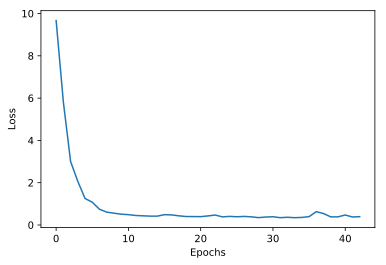

Confusion Matrix:

 [[131  16]
 [  6   7]]


Classification Report:

               precision    recall  f1-score   support

           0       0.96      0.89      0.92       147
           1       0.30      0.54      0.39        13

   micro avg       0.86      0.86      0.86       160
   macro avg       0.63      0.71      0.66       160
weighted avg       0.90      0.86      0.88       160

Accuracy:86.25%
Misclassified samples: 22


In [31]:
L = [10, 100, 1000]
for i in L:
    print('\nNumber of Hidden Layers = 1, Size of hidden layers =',i,end='\n\n')
    mlp = MLPClassifier(hidden_layer_sizes=i,max_iter=1000, verbose=True, random_state=1)
    mlp.fit(X_train,Y_train) 
    plt.plot(mlp.loss_curve_)
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.show()
    predictions = mlp.predict(X_test)
    report(predictions, Y_test)

Case - Multiple Hidden Layers


Number of Hidden Layers = 1, Size of hidden layers = 10

Iteration 1, loss = 11.41186243
Iteration 2, loss = 11.34570623
Iteration 3, loss = 11.26944178
Iteration 4, loss = 11.13211834
Iteration 5, loss = 10.93226776
Iteration 6, loss = 10.66927288
Iteration 7, loss = 10.32847141
Iteration 8, loss = 9.96313870
Iteration 9, loss = 9.53362138
Iteration 10, loss = 8.97472938
Iteration 11, loss = 8.23907662
Iteration 12, loss = 7.21212587
Iteration 13, loss = 5.70120884
Iteration 14, loss = 3.72241489
Iteration 15, loss = 1.99231062
Iteration 16, loss = 1.75954906
Iteration 17, loss = 1.80324113
Iteration 18, loss = 1.46013505
Iteration 19, loss = 1.41748072
Iteration 20, loss = 1.40535447
Iteration 21, loss = 1.32530714
Iteration 22, loss = 1.29016013
Iteration 23, loss = 1.26753052
Iteration 24, loss = 1.23265845
Iteration 25, loss = 1.20698747
Iteration 26, loss = 1.18422070
Iteration 27, loss = 1.16161633
Iteration 28, loss = 1.13301496
Iteration 29, loss = 1.11050675
Iteration 30, lo

Iteration 253, loss = 0.42483672
Iteration 254, loss = 0.42225741
Iteration 255, loss = 0.41753998
Iteration 256, loss = 0.41811964
Iteration 257, loss = 0.41712803
Iteration 258, loss = 0.41529046
Iteration 259, loss = 0.41491233
Iteration 260, loss = 0.41454302
Iteration 261, loss = 0.41462141
Iteration 262, loss = 0.41476534
Iteration 263, loss = 0.41418544
Iteration 264, loss = 0.41036783
Iteration 265, loss = 0.41154000
Iteration 266, loss = 0.41045840
Iteration 267, loss = 0.40962451
Iteration 268, loss = 0.41167129
Iteration 269, loss = 0.41202237
Iteration 270, loss = 0.40963076
Iteration 271, loss = 0.40909939
Iteration 272, loss = 0.40643071
Iteration 273, loss = 0.40568895
Iteration 274, loss = 0.40620623
Iteration 275, loss = 0.40504440
Iteration 276, loss = 0.40430574
Iteration 277, loss = 0.40387649
Iteration 278, loss = 0.40471867
Iteration 279, loss = 0.40231145
Iteration 280, loss = 0.41316190
Iteration 281, loss = 0.40530187
Iteration 282, loss = 0.40020160
Iteration 

Iteration 503, loss = 0.32005269
Iteration 504, loss = 0.33114272
Iteration 505, loss = 0.31791606
Iteration 506, loss = 0.31485374
Iteration 507, loss = 0.31504832
Iteration 508, loss = 0.31356562
Iteration 509, loss = 0.31149457
Iteration 510, loss = 0.30971815
Iteration 511, loss = 0.30889033
Iteration 512, loss = 0.30875132
Iteration 513, loss = 0.30973713
Iteration 514, loss = 0.30953025
Iteration 515, loss = 0.30739687
Iteration 516, loss = 0.30752454
Iteration 517, loss = 0.30669709
Iteration 518, loss = 0.30953569
Iteration 519, loss = 0.30991526
Iteration 520, loss = 0.30882572
Iteration 521, loss = 0.30893585
Iteration 522, loss = 0.30793622
Iteration 523, loss = 0.31609511
Iteration 524, loss = 0.31050507
Iteration 525, loss = 0.31458184
Iteration 526, loss = 0.31707927
Iteration 527, loss = 0.30587495
Iteration 528, loss = 0.30546204
Iteration 529, loss = 0.30316304
Iteration 530, loss = 0.30797527
Iteration 531, loss = 0.30756111
Iteration 532, loss = 0.30772325
Iteration 

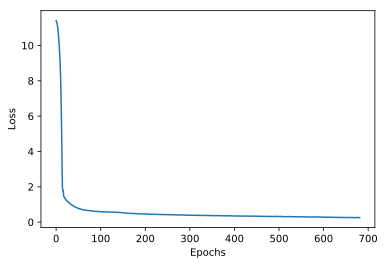

Confusion Matrix:

 [[125  22]
 [  2  11]]


Classification Report:

               precision    recall  f1-score   support

           0       0.98      0.85      0.91       147
           1       0.33      0.85      0.48        13

   micro avg       0.85      0.85      0.85       160
   macro avg       0.66      0.85      0.70       160
weighted avg       0.93      0.85      0.88       160

Accuracy:85.00%
Misclassified samples: 24

Number of Hidden Layers = 1, Size of hidden layers = 100

Iteration 1, loss = 11.51292932
Iteration 2, loss = 11.51292926
Iteration 3, loss = 11.51156793
Iteration 4, loss = 6.43942716
Iteration 5, loss = 8.56179854
Iteration 6, loss = 8.59609799
Iteration 7, loss = 3.44824273
Iteration 8, loss = 4.37462422
Iteration 9, loss = 2.25391372
Iteration 10, loss = 2.13490314
Iteration 11, loss = 1.84602582
Iteration 12, loss = 1.65834667
Iteration 13, loss = 1.50594640
Iteration 14, loss = 1.43108210
Iteration 15, loss = 1.38703055
Iteration 16, loss = 1.31968

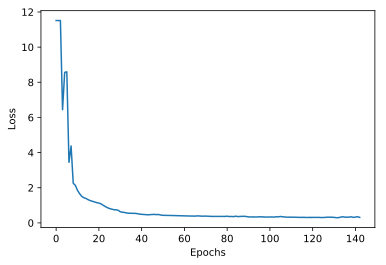

Confusion Matrix:

 [[130  17]
 [  4   9]]


Classification Report:

               precision    recall  f1-score   support

           0       0.97      0.88      0.93       147
           1       0.35      0.69      0.46        13

   micro avg       0.87      0.87      0.87       160
   macro avg       0.66      0.79      0.69       160
weighted avg       0.92      0.87      0.89       160

Accuracy:86.88%
Misclassified samples: 21

Number of Hidden Layers = 1, Size of hidden layers = 1000

Iteration 1, loss = 9.66818544
Iteration 2, loss = 5.81691908
Iteration 3, loss = 3.00225364
Iteration 4, loss = 2.06119807
Iteration 5, loss = 1.25340045
Iteration 6, loss = 1.07613726
Iteration 7, loss = 0.74326260
Iteration 8, loss = 0.60821554
Iteration 9, loss = 0.55778412
Iteration 10, loss = 0.51111265
Iteration 11, loss = 0.48856272
Iteration 12, loss = 0.44928113
Iteration 13, loss = 0.43329600
Iteration 14, loss = 0.41886537
Iteration 15, loss = 0.41867413
Iteration 16, loss = 0.4879924

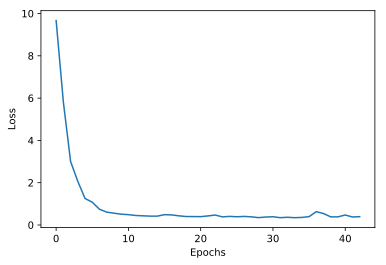

Confusion Matrix:

 [[131  16]
 [  6   7]]


Classification Report:

               precision    recall  f1-score   support

           0       0.96      0.89      0.92       147
           1       0.30      0.54      0.39        13

   micro avg       0.86      0.86      0.86       160
   macro avg       0.63      0.71      0.66       160
weighted avg       0.90      0.86      0.88       160

Accuracy:86.25%
Misclassified samples: 22


In [32]:
L = [10, 100, 1000]
for i in L:
    print('\nNumber of Hidden Layers = 1, Size of hidden layers =',i,end='\n\n')
    mlp = MLPClassifier(hidden_layer_sizes=i,max_iter=1000, verbose=True, random_state=1)
    mlp.fit(X_train,Y_train) 
    plt.plot(mlp.loss_curve_)
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.show()
    predictions = mlp.predict(X_test)
    report(predictions, Y_test)

Case 2 (a) - Varying Input Layers, Keeping Hidden Layers and Hidden Layer size, Iterations constant.

Iteration 1, loss = 1.90682977
Iteration 2, loss = 1.90682976
Iteration 3, loss = 1.90682975
Iteration 4, loss = 1.90682975
Iteration 5, loss = 1.90682974
Iteration 6, loss = 1.90682974
Iteration 7, loss = 1.90682973
Iteration 8, loss = 1.90682972
Iteration 9, loss = 1.90682972
Iteration 10, loss = 1.90682971
Iteration 11, loss = 1.90682971
Iteration 12, loss = 1.90682970
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.


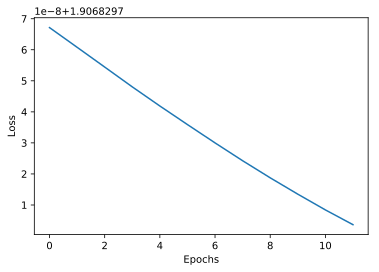

Confusion Matrix:

 [[148   0]
 [ 12   0]]


Classification Report:

               precision    recall  f1-score   support

           0       0.93      1.00      0.96       148
           1       0.00      0.00      0.00        12

   micro avg       0.93      0.93      0.93       160
   macro avg       0.46      0.50      0.48       160
weighted avg       0.86      0.93      0.89       160

Accuracy:92.50%
Misclassified samples: 12


/Users/vish/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/vish/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/vish/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [33]:
y = pkmn['Legendary'].values
X = pkmn.values[:,:1] #Total Only
X_train, X_test, Y_train, Y_test = train_test_split(X,y,test_size = 0.2, random_state = 1)

mlp = MLPClassifier(hidden_layer_sizes=(4),max_iter=1000, verbose=True)
mlp.fit(X_train,Y_train)

plt.plot(mlp.loss_curve_)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

predictions = mlp.predict(X_test)

print('Confusion Matrix:\n\n', confusion_matrix(Y_test,predictions))
print("\n")
print('Classification Report:\n\n',classification_report(Y_test,predictions,target_names=['0','1']))
accuracy = accuracy_score(Y_test, predictions)
print("Accuracy:%.2f%%" %(accuracy*100.0))
print('Misclassified samples: %d' % (Y_test != predictions).sum())

Case 2(b) - 3 Input Layers, 2 Hidden Layers, 1000 Iterations

Iteration 1, loss = 0.88280183
Iteration 2, loss = 0.59948700
Iteration 3, loss = 0.68371321
Iteration 4, loss = 0.46497133
Iteration 5, loss = 0.41017072
Iteration 6, loss = 0.37771583
Iteration 7, loss = 0.35208678
Iteration 8, loss = 0.38062867
Iteration 9, loss = 0.38770971
Iteration 10, loss = 0.36197577
Iteration 11, loss = 0.34951389
Iteration 12, loss = 0.34168272
Iteration 13, loss = 0.33443196
Iteration 14, loss = 0.33332296
Iteration 15, loss = 0.33332708
Iteration 16, loss = 0.32428376
Iteration 17, loss = 0.33292175
Iteration 18, loss = 0.32981534
Iteration 19, loss = 0.32735314
Iteration 20, loss = 0.32853509
Iteration 21, loss = 0.31813656
Iteration 22, loss = 0.31066036
Iteration 23, loss = 0.34234993
Iteration 24, loss = 0.32094157
Iteration 25, loss = 0.34988535
Iteration 26, loss = 0.32296289
Iteration 27, loss = 0.32544060
Iteration 28, loss = 0.30399507
Iteration 29, loss = 0.34090169
Iteration 30, loss = 0.34001166
Iteration 31, loss = 0.33005697
Iteration 32, los

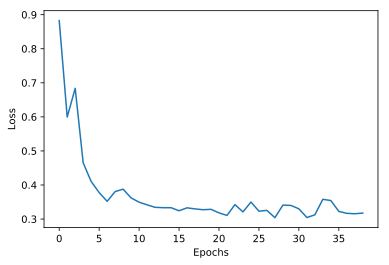

Confusion Matrix:

 [[291   0]
 [ 29   0]]


Classification Report:

               precision    recall  f1-score   support

           0       0.91      1.00      0.95       291
           1       0.00      0.00      0.00        29

   micro avg       0.91      0.91      0.91       320
   macro avg       0.45      0.50      0.48       320
weighted avg       0.83      0.91      0.87       320

Accuracy:90.94%
Misclassified samples: 29


/Users/vish/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/vish/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/vish/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [34]:
y = pkmn['Legendary'].values
X = pkmn.values[:,1:4] #HP, Attack, Defense
X_train, X_test, Y_train, Y_test = train_test_split(X,y,test_size = 0.4, random_state = 1)

mlp = MLPClassifier(hidden_layer_sizes=(100,100),max_iter=1000, verbose=True)
mlp.fit(X_train,Y_train)

plt.plot(mlp.loss_curve_)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

predictions = mlp.predict(X_test)

print('Confusion Matrix:\n\n', confusion_matrix(Y_test,predictions))
print("\n")
print('Classification Report:\n\n',classification_report(Y_test,predictions,target_names=['0','1']))
accuracy = accuracy_score(Y_test, predictions)
print("Accuracy:%.2f%%" %(accuracy*100.0))
print('Misclassified samples: %d' % (Y_test != predictions).sum())

Case 2(c) - 5 Input Layers, 2 Hidden Layers, 1000 Iterations

Iteration 1, loss = 0.64496862
Iteration 2, loss = 0.66690894
Iteration 3, loss = 0.56718702
Iteration 4, loss = 0.72483516
Iteration 5, loss = 0.44569732
Iteration 6, loss = 0.48122331
Iteration 7, loss = 0.37003370
Iteration 8, loss = 0.40763153
Iteration 9, loss = 0.32663437
Iteration 10, loss = 0.35266980
Iteration 11, loss = 0.36325965
Iteration 12, loss = 0.32152792
Iteration 13, loss = 0.32901773
Iteration 14, loss = 0.32628910
Iteration 15, loss = 0.31071253
Iteration 16, loss = 0.31330789
Iteration 17, loss = 0.30529744
Iteration 18, loss = 0.30293148
Iteration 19, loss = 0.30360590
Iteration 20, loss = 0.29664300
Iteration 21, loss = 0.31172814
Iteration 22, loss = 0.32291681
Iteration 23, loss = 0.30603677
Iteration 24, loss = 0.33673430
Iteration 25, loss = 0.30045236
Iteration 26, loss = 0.29287870
Iteration 27, loss = 0.30109791
Iteration 28, loss = 0.29170468
Iteration 29, loss = 0.28278632
Iteration 30, loss = 0.28332507
Iteration 31, loss = 0.27963745
Iteration 32, los

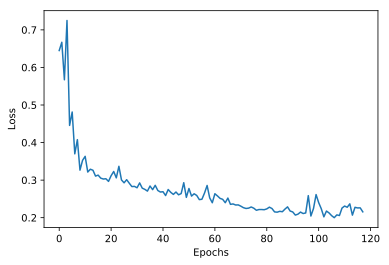

Confusion Matrix:

 [[289   2]
 [ 28   1]]


Classification Report:

               precision    recall  f1-score   support

           0       0.91      0.99      0.95       291
           1       0.33      0.03      0.06        29

   micro avg       0.91      0.91      0.91       320
   macro avg       0.62      0.51      0.51       320
weighted avg       0.86      0.91      0.87       320

Accuracy:90.62%
Misclassified samples: 30


In [35]:
y = pkmn['Legendary'].values
X = pkmn.values[:,3:7] #Attack, Defense, Sp.Atk, Sp. Def, Speed
X_train, X_test, Y_train, Y_test = train_test_split(X,y,test_size = 0.4, random_state = 1)

mlp = MLPClassifier(hidden_layer_sizes=(100,100),max_iter=1000, verbose=True)
mlp.fit(X_train,Y_train)

plt.plot(mlp.loss_curve_)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

predictions = mlp.predict(X_test)

print('Confusion Matrix:\n\n', confusion_matrix(Y_test,predictions))
print("\n")
print('Classification Report:\n\n',classification_report(Y_test,predictions,target_names=['0','1']))
accuracy = accuracy_score(Y_test, predictions)
print("Accuracy:%.2f%%" %(accuracy*100.0))
print('Misclassified samples: %d' % (Y_test != predictions).sum())

Case 3(a) - Max Input Layers, 4 Hidden Layers, 10 Iterations

Case 3(b) - Max Input Layers, 4 Hidden Layers, 100 Iterations

Case 3(c) - Max Input Layers, 4 Hidden Layers, 10000 Iterations

Generating an Unclassifiable Dataset

In [36]:
from sklearn.datasets import make_classification
from sklearn import model_selection
X, y = make_classification(n_samples=1000, 
    n_features=5, 
    n_redundant = 0,
    n_informative = 3,
    n_repeated = 0,
    n_classes = 3,
    n_clusters_per_class = 1,
    class_sep=0.75, 
    flip_y=0.1,
    random_state=1) 

In [37]:
df = pd.DataFrame({'x1':X[:,0], 'x2':X[:,1], 'x3':X[:,2], 'x4':X[:,3], 'y':y})
df

x1        x2        x3        x4  y
0    0.155075 -0.021346  2.065758 -1.163582  2
1   -0.136410  0.218346  1.552607 -0.082412  0
2    0.916242  0.099164 -0.196588 -0.797828  2
3   -0.430128  3.105847 -0.530896  0.381868  1
4    0.904163  1.640632  2.358967 -1.114091  2
5   -0.000529 -0.602001  1.793622 -0.800687  2
6   -2.744989 -0.176739 -1.817040  0.826903  1
7    0.582059  0.008917  0.779923  0.861119  1
8   -0.896151 -0.191626  1.307497  0.998263  0
9    0.007973  0.494234 -2.021816  0.290279  0
10  -1.477412  0.925768 -0.278026  0.616536  1
11   1.081547 -0.541918  0.709634  0.383136  2
12  -0.703743 -0.942065  0.043310  0.597328  1
13   0.468803 -0.013810  1.333457 -0.165463  0
14  -0.751589 -0.656190  1.111450 -1.360575  2
15   1.367565  1.467114  2.788162 -0.549647  2
16  -0.204800 -0.422772 -0.963758  1.099650  1
17   0.681203  0.260940  1.407121  0.580861  0
18   0.510072 -0.459692  2.145170 -0.097245  0
19  -0.252077 -1.158326 -0.810559  1.256857  0
20   0.589978  0.847189  0.830379 -1.060774  2
21   0.307124 -0.066116 -1.296566  1.367893  1
22  -1.177997 -0.267722 -0.763713  0.165982  2
23  -0.665591  0.381956 -0.030964  1.270611  1
24   0.215948 -1.026997 -1.634768  0.403382  1
25   0.203049 -1.816532  2.029317  1.030783  0
26   0.145146 -1.782268 -1.482469  0.245548  1
27   2.176812  0.081177  1.434045  0.321350  0
28  -1.398068 -0.583815  2.183666 -0.765959  2
29   0.781912 -0.818087  1.185878 -0.261882  0
..        ...       ...       ...       ... ..
970 -2.320542  0.239924 -0.995646  0.480844  1
971 -1.295771 -0.069149  2.934720  1.012393  0
972  0.130784 -2.277603 -0.422300  1.360099  1
973  0.459075 -1.480959  0.226154 -0.447403  2
974  0.841845 -0.414423 -1.858846  0.031580  1
975 -0.095850  1.316341 -1.371274  1.237933  2
976 -0.938466  0.432984 -0.905290  0.849382  1
977  0.193936 -1.299423  1.891246 -0.255514  1
978 -1.266867  1.338311 -0.411581  1.130648  0
979  1.838181  0.164040  0.785973  0.235148  2
980  1.647069 -0.361518  2.108761  1.777640  0
981  0.833987 -0.749413  0.211261  1.270905  0
982 -2.085933 -0.063740 -2.373810  1.735473  0
983  0.595960 -1.598545 -1.347118  0.297970  2
984  0.347128 -0.964163  0.293082 -0.683833  2
985  1.412166  1.061382  0.698329 -1.068230  2
986  1.500753  1.675113  1.295759  1.532952  0
987 -1.420886  0.389447  1.020714  0.201157  2
988  0.544851 -1.489459 -0.802824 -0.851789  0
989 -0.047331 -0.543423  0.514784  0.880059  0
990 -2.107075 -1.033587  0.030376  1.493770  0
991  0.445011  0.130568 -0.598727  0.473946  1
992  1.311179 -0.595599  1.128394  2.302961  0
993 -1.343622  0.334543 -0.174212 -0.249994  2
994 -1.433533  1.195171 -2.621706 -0.275186  1
995  0.878832 -1.576981  0.696571  1.577352  2
996 -3.041595 -0.073538  0.105179  2.065194  0
997  1.228216  0.241476 -0.466999  1.291069  1
998  0.520638  0.057868  1.064194 -0.367738  2
999 -0.357179 -1.791332 -0.209613  1.208604  1

[1000 rows x 5 columns]

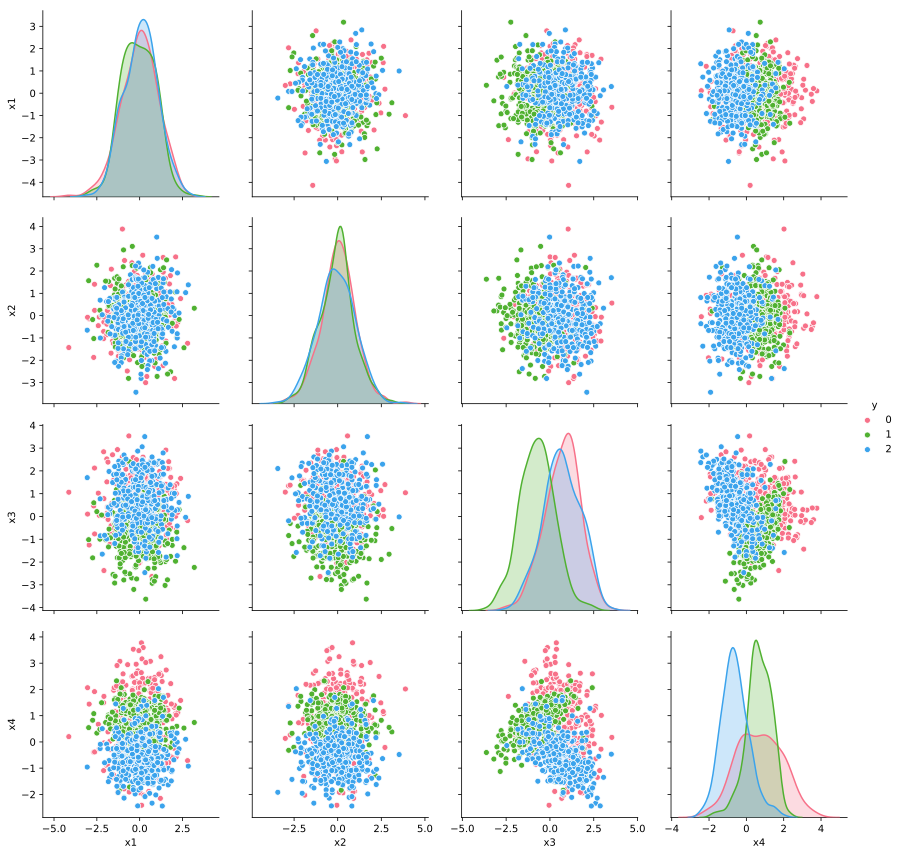

In [38]:
sb.pairplot(df, height=3,vars=['x1','x2','x3','x4'],hue="y",palette="husl")